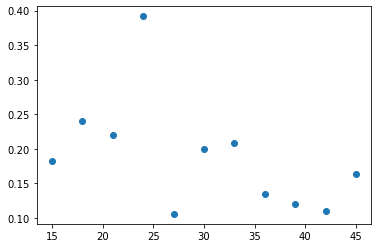

,Large Max-X Range,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,15,0.993127,0.015875,0.037844,0.181782
1,18,0.969547,0.017617,0.343478,0.240202
2,21,0.994239,0.013901,0.160692,0.219573
3,24,0.993749,0.021847,0.112729,0.391863
4,27,1.008236,0.005265,-0.117325,0.105605
5,30,1.000053,0.009001,-0.007608,0.199525
6,33,1.010446,0.008563,-0.230590,0.207736
7,36,1.007647,0.005083,-0.205875,0.133875
8,39,0.999901,0.004198,0.091522,0.119260
9,42,1.000810,0.003596,0.038932,0.109554


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

slope = []
dslope = []
yint = []
dyint = []
type = []

npts = 11
xlow = 0.5
xhighs = []

for largex in range(5, 16):
    newrange = largex * 3
    xhighs.append(newrange)
    xl = xlow + 0.01
    xmid = (newrange+xlow)/2.0+0.01

    xi = np.linspace(xlow,newrange,npts)
    yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
    yi = xi + yrandom

    sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
    #plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

    init_vals = [0.0 for x in range(2)]
    popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
    perr = np.sqrt(np.diag(pcov))

    ps = np.random.multivariate_normal(popt,pcov,10000)
    ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

    slope.append(popt[1])
    dslope.append(perr[1])
    yint.append(popt[0])
    dyint.append(perr[0])
    type.append('{}'.format(newrange))
    
plt.scatter(xhighs, dyint)
plt.show()

df = pd.DataFrame({'Large Max-X Range':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)

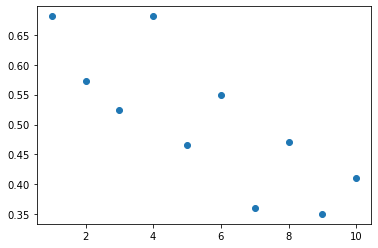

,Min-X,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,1,1.564257,0.525550,-0.677777,0.680951
1,2,1.162840,0.221565,-0.446259,0.573069
2,3,1.116702,0.135208,-0.488731,0.523698
3,4,0.883554,0.131992,0.465894,0.680661
4,5,0.835093,0.072421,0.971785,0.466228
5,6,0.938876,0.071178,0.368193,0.549232
6,7,1.025751,0.040015,-0.303501,0.359855
7,8,1.064378,0.045904,-0.537820,0.471348
8,9,0.974921,0.030384,0.168480,0.350685
9,10,0.981181,0.032087,0.280634,0.411173


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

slope = []
dslope = []
yint = []
dyint = []
type = []
xlows = []

npts = 11

for v in range(1, 11):
    xhigh = v * 1.5
    xlow = v

    xlows.append(xlow)
    xl = xlow + 0.01
    xmid = (xhigh+xlow)/2.0+0.01

    xi = np.linspace(xlow,xhigh,npts)
    yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
    yi = xi + yrandom

    sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])

    init_vals = [0.0 for x in range(2)]
    popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
    perr = np.sqrt(np.diag(pcov))

    ps = np.random.multivariate_normal(popt,pcov,10000)
    ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

    slope.append(popt[1])
    dslope.append(perr[1])
    yint.append(popt[0])
    dyint.append(perr[0])
    type.append('{}'.format(xlow))
    
plt.scatter(xlows, dyint)
plt.show()

df = pd.DataFrame({'Min-X':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head(10)

# Question 1 Conclusion

Larger Max-X ranges generally result in lower error rates of the y-intercept and slope. Increasing the Min-X value to be closer to the Max-X value SIGNIFICANTLY increases these two error values. Furthermore, increasing both the Min-X and Max-X values with a scalar factor also generally decreases the y-intercept error, and also generally decreases the slope error.

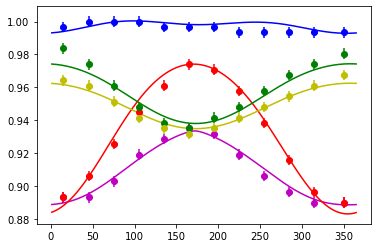

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Sun import Sun

# Number of days in the sidereal year
daysPerYear = 365.256363

# Array to hold day of year

dayOfYear = np.array([i for i in range(1,366)])

# Earth-Sun Distance in A.U.
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2

tiltAngle = -23.44*np.pi/180.0
angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))

angleAkureyri = 65.654551*np.pi/180.0 - angle
anglePortland = 43.659218*np.pi/180.0 - angle
anglePanamaCity = 8.982325*np.pi/180.0 - angle
angleAdelaide = -34.926111*np.pi/180.0 - angle
angleGisborne = -37.490012*np.pi/180.0 - angle

# Akureyri
coords = {'longitude': -18.075707, 'latitude': 65.654551}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionAkureyri = dayLength/12.0


# Portland
coords = {'longitude': -70.256519, 'latitude': 43.659218}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionPortland = dayLength/12.0


# Panama City
coords = {'longitude': -79.527030, 'latitude': 8.982325}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionPanamaCity = dayLength/12.0


# Adelaide
coords = {'longitude': 138.599854, 'latitude': -34.926111}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionAdelaide = dayLength/12.0


# Gisborne
coords = {'longitude': 144.590800, 'latitude': -37.490012}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionGisborne = dayLength/12.0

tempAkureyriTheory = (np.cos(angleAkureyri)*relPower*np.sqrt(lengthCorrectionAkureyri))
tempPortlandTheory = (np.cos(anglePortland)*relPower*np.sqrt(lengthCorrectionPortland))
tempPanamaCityTheory = (np.cos(anglePanamaCity)*relPower*np.sqrt(lengthCorrectionPanamaCity))
tempAdelaideTheory = (np.cos(angleAdelaide)*relPower*np.sqrt(lengthCorrectionAdelaide))
tempGisborneTheory = (np.cos(angleGisborne)*relPower*np.sqrt(lengthCorrectionGisborne))

# Monthly averages highs from 1981 to 2010
tempAkureyri = np.array([1,2,2,5,10,13,15,14,10,6,3,1])+273.15
tempPortland = np.array([1,2,6,12,18,23,27,26,22,16,9,3])+273.15
tempPanamaCity = np.array([33,34,35,35,35,34,34,34,33,33,33,33])+273.15
tempAdelaide = np.array([29,30,27,23,19,16,15,17,19,22,25,27])+273.15
tempGisborne = np.array([25,24,23,20,17,15,14,15,17,19,21,23])+273.15

error = np.array([1 for i in range(12)])

mean = tempPanamaCity.max()
tempAkureyri=tempAkureyri/mean
tempPortland=tempPortland/mean
tempAdelaide=tempAdelaide/mean
tempPanamaCity = tempPanamaCity/mean
tempGisborne = tempGisborne/mean
error=error/mean

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365

plt.errorbar(month,tempAkureyri,yerr=error,fmt='mo')
plt.errorbar(month,tempPortland,yerr=error,fmt='ro')
plt.errorbar(month,tempAdelaide,yerr=error,fmt='go')
plt.errorbar(month,tempGisborne,yerr=error,fmt='yo')
plt.errorbar(month,tempPanamaCity,yerr=error,fmt='bo')
plt.plot(dayOfYear,(tempPanamaCityTheory-1)/20+.999999,'b')
plt.plot(dayOfYear,(tempAkureyriTheory-1)/22+.9335,'m')
plt.plot(dayOfYear,(tempPortlandTheory-1)/7.5+.97,'r')
plt.plot(dayOfYear,(tempAdelaideTheory-1)/18+.968,'g')
plt.plot(dayOfYear,(tempGisborneTheory-1)/25+.958,'y')

# Question 2 Conclusion

[Scale Factor,Offset] by City:

Panama City: [.999999,20]

Akureyri: [.9335,22]

Portland: [.97,7.5]

Adelaide: [.968,18]

Gisborne: [.958,25]

Periodup = 1.99644 +/- 0.00000821
Perioddown = 1.99350 +/- 0.00000855

Periodup = 1.99940 +/- 0.00000790
Perioddown = 1.99729 +/- 0.00000951

Periodup = 2.00225 +/- 0.00000704
Perioddown = 2.00111 +/- 0.00000879

Periodup = 2.00538 +/- 0.00000830
Perioddown = 2.00522 +/- 0.00000694

Periodup = 2.00853 +/- 0.00000815
Perioddown = 2.00923 +/- 0.00000776

Periodup = 2.01135 +/- 0.00000904
Perioddown = 2.01295 +/- 0.00000695

Periodup = 2.01496 +/- 0.00000739
Perioddown = 2.01722 +/- 0.00000901



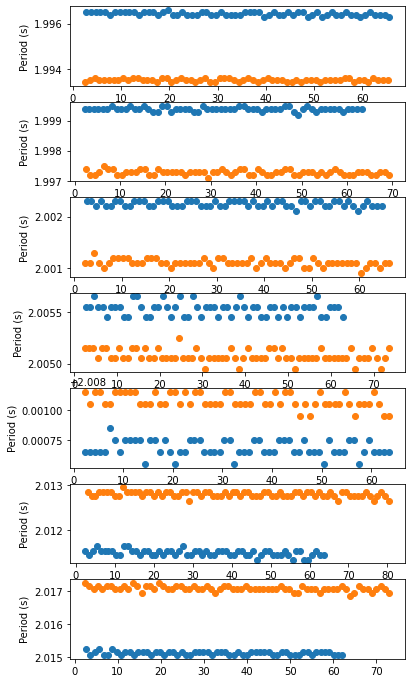

Coefficients (from curve_fit)
[1.99334145e+00 2.88281353e-03 2.55494216e-05]
Covariance Matrix (from curve_fit)
[[ 6.65189866e-08 -3.50317192e-08  3.87682677e-09]
 [-3.50317192e-08  2.13019280e-08 -2.51900258e-09]
 [ 3.87682677e-09 -2.51900258e-09  3.11052743e-10]]
Coefficients (from curve_fit)
[1.98920413e+00 3.95612245e-03 3.50409130e-06]
Covariance Matrix (from curve_fit)
[[ 3.27039515e-08 -1.72241254e-08  1.90612752e-09]
 [-1.72241254e-08  1.04737003e-08 -1.23851452e-09]
 [ 1.90612752e-09 -1.23851452e-09  1.52929793e-10]]


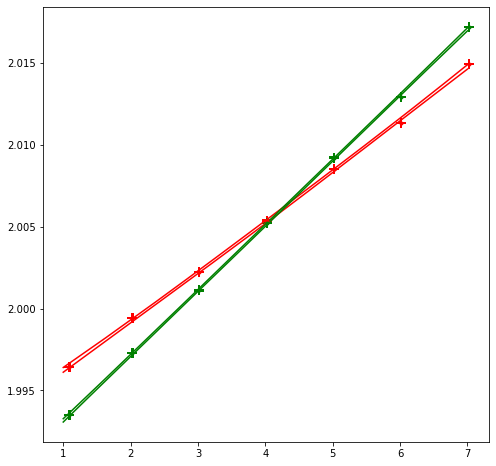

Period = 2.00596 +/- 0.00061
g = 9.7973 +/- 0.0060


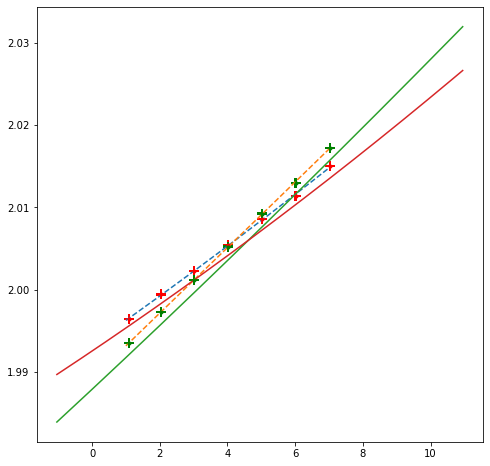

Coefficients (from curve_fit)
[9.80416224]
Covariance Matrix (from curve_fit)
[[5.20369657e-05]]
Coefficients (from curve_fit)
[9.80679668]
Covariance Matrix (from curve_fit)
[[5.38148969e-05]]


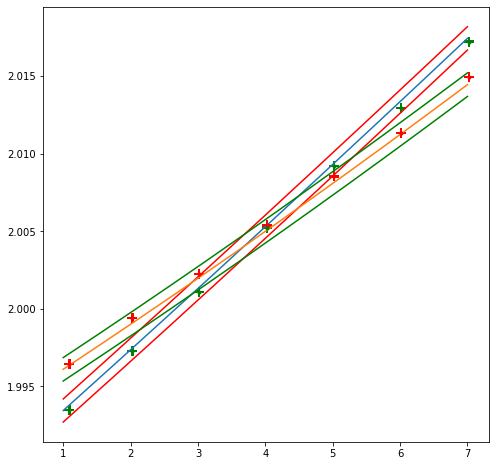

Period = 2.00545 +/- 0.01274
g = 9.8023 +/- 0.1245


In [140]:
#  position of small mass (in cm)
xpos = np.array([1.092,2.026,3.017,4.023,5.019,6.011,7.021])
dxpos = np.array([0.003 for i in range(len(xpos))])

prefix = './gitfiles/phys421/JupyterNotebooks/KaterPendulum/data/scan2/kater_2_run'
suffix = '.txt'

tup = []
tdown = []
dtup = []
dtdown = []

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(6,12)) 

for i in range(1,8):
    i2 = 2*i
    j = 2*i - 1
    fname1 = prefix + str(i2) + suffix
    fname2 = prefix + str(j) + suffix

    dfup = pd.read_csv(fname1,sep='\t')
    dfdown = pd.read_csv(fname2,sep='\t')
    
    timeup = np.array(dfup['Time'])
    periodup = []
    for k in range(2,len(timeup)):
        periodup.append(timeup[k]-timeup[k-2])
    
    periodup=np.array(periodup)

    semup = periodup.std()/np.sqrt(len(periodup))
    print ("Periodup = %0.5f +/- %0.8f" % (periodup.mean(),semup))
    
    timedown = np.array(dfdown['Time'])
    perioddown = []
    for k in range(2,len(timedown)):
        perioddown.append(timedown[k]-timedown[k-2])
    
    perioddown=np.array(perioddown)

    semdown = perioddown.std()/np.sqrt(len(perioddown))
    print ("Perioddown = %0.5f +/- %0.8f" % (perioddown.mean(),semdown))
    
    # Cleaning / separating
    if periodup.mean() - perioddown.mean() <= 0.00016:
        periodup += 0.00015
        perioddown -= 0.00015
        
    tup.append(periodup.mean())
    dtup.append(semup)
    tdown.append(perioddown.mean())
    dtdown.append(semup)

    axs[i-1].plot(timeup[2:],periodup,'o')
    axs[i-1].plot(timedown[2:],perioddown,'o')
    axs[i-1].set_ylabel('Period (s)')
    print("")
    
tup = np.array(tup)
tdown = np.array(tdown)
dtup = np.array(dtup)
dtdown = np.array(dtdown)

plt.show()

# Let's do linear fits using the curve_fit utility from scipy

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x + paramlist[2]*x*x

init_vals = [0.0 for x in range(3)]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [0.0 for x in range(3)]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

#axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

#axs2.plot(xi,middle)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

plt.show()

tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))

length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))


# Measured distances and masses
M=1.35928 # large mass
m=0.72705 # small mass
Mbar=2.90 # mass of bar (with small and large masses removed)
D=0.9986 # distance between knife-edge pivot points
L=1.523  # length of bar
#
#g = 9.799 # value of g in Newport News
g = 9.7972

# Distance calculations
#
# The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
# The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
# The radius of the large mass is 4.753 cm
# The radius of the small mass is 3.498 cm
RM = 0.04753
Rm = 0.03498
offsetM = 0.0135
offsetm = 0.0104
l1=D/2.0+RM+offsetM

# Find the value of x that satisfies the equation above

diff = 1.0E+99
olddiff = 1.0E+99
l2 = []
xpos = []
t1 = []
t2 = []
for i in range(1000):
    l2.append(D/2.0+Rm+(i/1000.0)*.12)
    xpos.append((l2[i]-offsetm-D/2-Rm-0.0000)*100) # distance from the small mass to the knife-edge, in cm.
    x=(M*l1-m*l2[i])/(M+m+Mbar)
    h2=D/2.0+x
    h1=D/2.0-x
    lhs=h1*h2;
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2[i]+x)*(l2[i]+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    diff = lhs-rhs
    if (np.abs(diff)<olddiff):
        olddiff=diff
        index=i
    t1.append(2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1)))
    t2.append(2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2)))
    

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu,'--')

axs2.plot(xi,middled,'--')

axs2.plot(xpos,t1,label='Small Mass Down')
axs2.plot(xpos,t2,label='Small Mass Up')

plt.show()


def theoryfitfunction1(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    #fudge_factor = paramlist[1]
    fudge_factor= 0.0062

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0135
    offsetm = 0.0104
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t1

def theoryfitfunction2(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    #fudge_factor = paramlist[1]
    fudge_factor= 0.0062

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0135
    offsetm = 0.0104
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t2

# UPDATED
init_vals = [9.7972]

x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(theoryfitfunction1,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([theoryfitfunction1(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

# UPDATED
init_vals = [9.7972]

x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(theoryfitfunction2,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([theoryfitfunction2(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

plt.show()

tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))

length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

# Question 3 Conclusion

The 4th comparison's up and down times were very very close, so to separate/clean them, if their difference was less than or equal to 0.00016, I added/subtracted 0.0015 from each up/down value.

The best g-value for this data is 9.7972, and it seems that a fudge-factor offset of 0.0062 gives the best comparison. I would consider this to be a reasonable offset given its very low value (for minimal data manipulation) and accuracy for upper and lower bounds, reflected in the plot above.